<a href="https://colab.research.google.com/github/davidsonn1/davidsonn1.github.io/blob/main/DOS/Problem1%262.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem set 1**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#1

In [ ]:
# A social media influencer decides to open a new page and her target is to reach 20k followers in 15 weeks.
# Given her past experience, she assumes that each week she will get 1.5k new followers that had never followed the page and of her current followers she believes 8% will stop following the page each week.
# However, 15% of those that left the page in the past will join again each week. Will she reach her target?

# Initialize arrays (length 16, all zeros)
Ft = np.zeros(16) # Followers
Ut = np.zeros(16) # Total Unfollowers
Lt = np.zeros(16) # Weekly Unfollowers
Rt = np.zeros(16) # Weekly Returners

# Loop
for i in range(15):
    Lt[i+1] = 0.08 * Ft[i]
    Rt[i+1] = 0.15 * Ut[i]
    Ut[i+1] = Ut[i] + Lt[i+1] - Rt[i+1]
    Ft[i+1] = Ft[i] + 1500 - Lt[i+1] + Rt[i+1]

# Create DataFrame
result = pd.DataFrame({
    "Followers": Ft.round(),
    "Total Unfollowers": Ut.round(),
    "Weekly Unfollowers": Lt.round(),
    "Weekly Returns": Rt.round()
})

result

,Followers,Total Unfollowers,Weekly Unfollowers,Weekly Returns
0,0.0,0.0,0.0,0.0
1,1500.0,0.0,0.0,0.0
2,2880.0,120.0,120.0,0.0
3,4168.0,332.0,230.0,18.0
4,5384.0,616.0,333.0,50.0
5,6546.0,954.0,431.0,92.0
6,7665.0,1335.0,524.0,143.0
7,8752.0,1748.0,613.0,200.0
8,9814.0,2186.0,700.0,262.0
9,10857.0,2643.0,785.0,328.0


Looking at the simulation results, at 15 weeks she will have approximately 16,897 followers.
Since her target is 20,000 followers she will not reach her target in 15 weeks.

#2

In [ ]:
def social_media_sim(followers, weeks, new, per_unfollow, per_refollows):
    # Run simulation for up to 52 weeks max
    Ft = np.zeros(53)  # Followers
    Ut = np.zeros(53)  # Total Unfollowers
    Lt = np.zeros(53)  # Weekly Unfollowers
    Rt = np.zeros(53)  # Weekly Returners

    # Run the simulation
    for i in range(52):
        Lt[i+1] = per_unfollow * Ft[i]
        Rt[i+1] = per_refollows * Ut[i]
        Ut[i+1] = Ut[i] + Lt[i+1] - Rt[i+1]
        Ft[i+1] = Ft[i] + new - Lt[i+1] + Rt[i+1]

        # If followers hit 0, stop
        if Ft[i+1] <= 0:
            return "Goal will not be met."

        # Check if we hit the goal within the target weeks
        if i + 1 <= weeks and Ft[i+1] >= followers:
            extra = Ft[i+1] - followers
            return f"Goal met. Goal achieved in week {i+1} with {extra:.0f} followers above target."

    # See what happened at the end of the target weeks
    if Ft[weeks] < followers:
        how_many = Ft[weeks]

        # See if we eventually hit the goal within 52 weeks
        for i in range(weeks, 52):
            if Ft[i+1] >= followers:
                more_weeks = (i + 1) - weeks
                return f"Goal not met. After {weeks} weeks, you have {how_many:.0f} followers. You need {more_weeks} additional weeks to reach your goal."

        # Never hit the goal
        return "Goal will not be met."

    return "Goal will not be met."

# Test it with original numbers which we know is not going to work
print(social_media_sim(20000, 15, 1500, 0.08, 0.15))
#Test again with higher followers each week (kind of fudged this to make sure it does meet the goal)
print(social_media_sim(20000, 15, 2000, 0.08, 0.15))
#Test one more time just to see if we can get the actual numbers we want. Eg 20000 at week 15 which equates to 1776 per week
print(social_media_sim(20000, 15, 1776, 0.08, 0.15))

Goal not met. After 15 weeks, you have 16897 followers. You need 4 additional weeks to reach your goal.
Goal met. Goal achieved in week 14 with 1208 followers above target.
Goal met. Goal achieved in week 15 with 6 followers above target.


#3

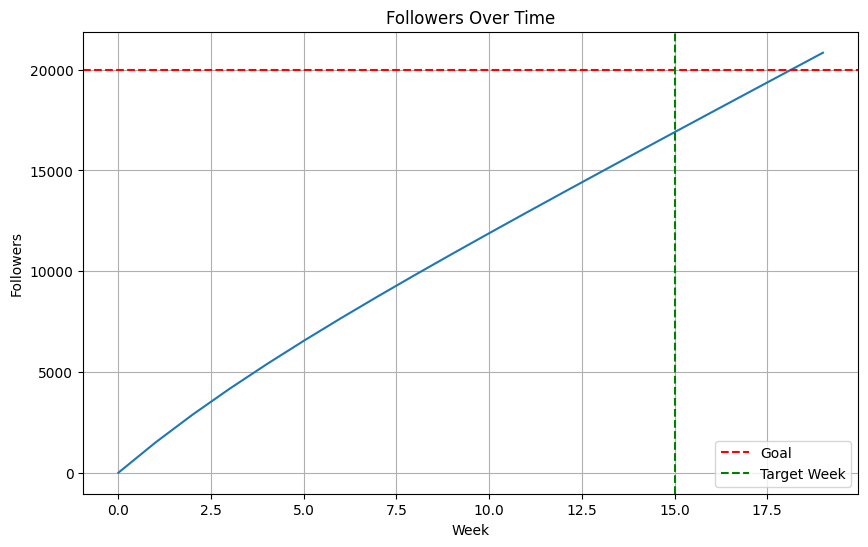

Goal not met. You have 16897 followers after 15 weeks and need 4 more weeks to hit your goal.


In [ ]:
def social_media_sim(followers, weeks, new, per_unfollow, per_refollows):
    # Run simulation for up to 52 weeks max
    Ft = np.zeros(53)  # Followers
    Ut = np.zeros(53)  # Total Unfollowers
    Lt = np.zeros(53)  # Weekly Unfollowers
    Rt = np.zeros(53)  # Weekly Returners

    # Run the simulation
    for i in range(52):
        Lt[i+1] = per_unfollow * Ft[i]
        Rt[i+1] = per_refollows * Ut[i]
        Ut[i+1] = Ut[i] + Lt[i+1] - Rt[i+1]
        Ft[i+1] = Ft[i] + new - Lt[i+1] + Rt[i+1]

        # If followers hit 0, stop
        if Ft[i+1] <= 0:
            plt.figure(figsize=(10, 6))
            plt.plot(range(i+2), Ft[:i+2])
            plt.xlabel('Week')
            plt.ylabel('Followers')
            plt.title('Followers Over Time')
            plt.grid(True)
            plt.show()
            return "Goal will not be met."

        # Check if we hit the goal within the target weeks
        if i + 1 <= weeks and Ft[i+1] >= followers:
            extra = Ft[i+1] - followers
            plt.figure(figsize=(10, 6))
            plt.plot(range(i+2), Ft[:i+2])
            plt.axhline(y=followers, color='r', linestyle='--', label='Goal')
            plt.xlabel('Week')
            plt.ylabel('Followers')
            plt.title('Followers Over Time')
            plt.legend()
            plt.grid(True)
            plt.show()
            return f"Goal met. Goal achieved in week {i+1} with {extra:.0f} followers above target."

    # See what happened at the end of the target weeks
    if Ft[weeks] < followers:
        how_many = Ft[weeks]

        # See if we eventually hit the goal within 52 weeks
        for i in range(weeks, 52):
            if Ft[i+1] >= followers:
                more_weeks = (i + 1) - weeks
                plt.figure(figsize=(10, 6))
                plt.plot(range(i+2), Ft[:i+2])
                plt.axhline(y=followers, color='r', linestyle='--', label='Goal')
                plt.axvline(x=weeks, color='g', linestyle='--', label='Target Week')
                plt.xlabel('Week')
                plt.ylabel('Followers')
                plt.title('Followers Over Time')
                plt.legend()
                plt.grid(True)
                plt.show()
                return f"Goal not met. You have {how_many:.0f} followers after {weeks} weeks and need {more_weeks} more weeks to hit your goal."

        # Never hit the goal
        plt.figure(figsize=(10, 6))
        plt.plot(range(53), Ft)
        plt.axhline(y=followers, color='r', linestyle='--', label='Goal')
        plt.axvline(x=weeks, color='g', linestyle='--', label='Target Week')
        plt.xlabel('Week')
        plt.ylabel('Followers')
        plt.title('Followers Over Time')
        plt.legend()
        plt.grid(True)
        plt.show()
        return "Goal will not be met."

    plt.figure(figsize=(10, 6))
    plt.plot(range(53), Ft)
    plt.xlabel('Week')
    plt.ylabel('Followers')
    plt.title('Followers Over Time')
    plt.grid(True)
    plt.show()
    return "Goal will not be met."

# Test it
print(social_media_sim(20000, 15, 1500, 0.08, 0.15))

#4

In [ ]:
def find_init_users(per_new, churn, per_reactivate, act_cap, target_num, weeks):
    # Try starting numbers from 1 up to some reasonable max
    for start in range(1, 100000):
        At = np.zeros(weeks + 1)  # Active users
        It = np.zeros(weeks + 1)  # Inactive users

        At[0] = start

        valid = True
        for i in range(weeks):
            new_users = per_new * At[i]
            churned = churn
            reactivated = min(per_reactivate * It[i], act_cap)
            It[i+1] = It[i] + churned - reactivated
            At[i+1] = At[i] + new_users - churned + reactivated

            # If it goes negative, this starting value won't work
            if At[i+1] < 0:
                valid = False
                break

        # Check if we hit the target with this starting value
        if valid and At[weeks] >= target_num:
            return start

    # If we never found it
    return "Not possible under given assumptions."

# Test it
answer = find_init_users(0.15, 750, 0.25, 500, 20000, 20)
print(f"Minimum starting users: {answer}")
if isinstance(answer, int):
    print(f"Rounded to nearest 500: {round(answer / 500) * 500}")

Minimum starting users: 3609
Rounded to nearest 500: 3500


#5

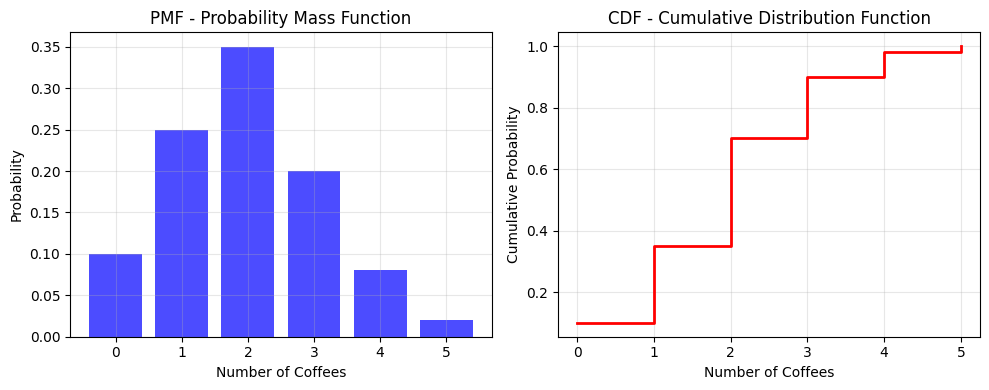

Mean: 1.97
Median: 2
Mode: 2
Variance: 1.35
Standard Deviation: 1.16


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of coffees someone drinks per day
# Allowable outputs: 0, 1, 2, 3, 4, 5
outcomes = np.array([0, 1, 2, 3, 4, 5])
probabilities = np.array([0.1, 0.25, 0.35, 0.2, 0.08, 0.02])

# PMF plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(outcomes, probabilities, color='blue', alpha=0.7)
plt.xlabel('Number of Coffees')
plt.ylabel('Probability')
plt.title('PMF - Probability Mass Function')
plt.grid(True, alpha=0.3)

# CDF plot
cdf = np.cumsum(probabilities)
plt.subplot(1, 2, 2)
plt.step(outcomes, cdf, where='post', color='red', linewidth=2)
plt.xlabel('Number of Coffees')
plt.ylabel('Cumulative Probability')
plt.title('CDF - Cumulative Distribution Function')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate statistics
mean = np.sum(outcomes * probabilities)
variance = np.sum((outcomes - mean)**2 * probabilities)
std_dev = np.sqrt(variance)

# Mode
mode = outcomes[np.argmax(probabilities)]

# Median - find where CDF >= 0.5
median_idx = np.where(cdf >= 0.5)[0][0]
median = outcomes[median_idx]

print(f"Mean: {mean:.2f}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Variance: {variance:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")

#6 See Excel Sheet

#7

Part a:
Expected heads: 52.0
Expected tails: 48.0

Part b:
Probability of 6 heads in 10 flips: 0.2204

Part c:
Probability of more than 580 heads in 1000 flips: 0.0001

Part d:
The coin needs to be rigged to p = 0.817 (or 81.7% heads)


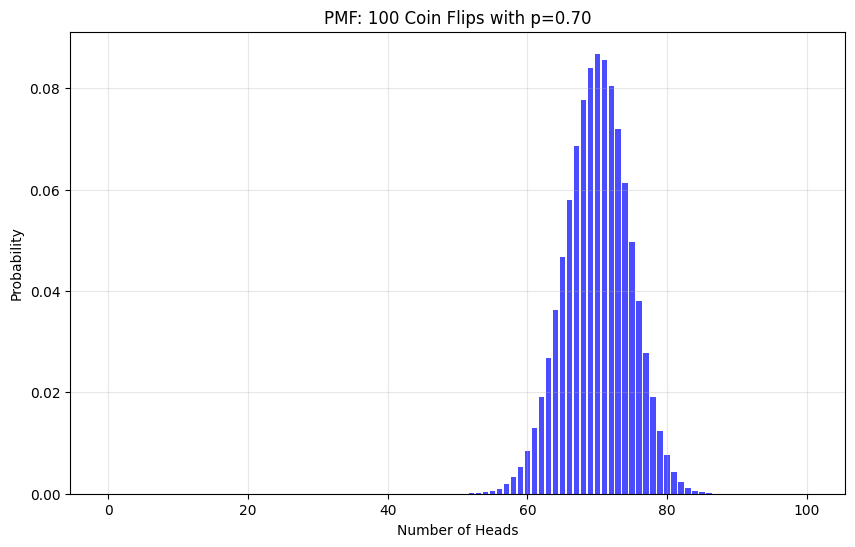


Part e:
PMF generated for 100 flips with p=0.70


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# a. Expected number of heads & tails after 100 flips
n = 100
p = 0.52
expected_heads = n * p
expected_tails = n * (1 - p)

print("Part a:")
print(f"Expected heads: {expected_heads}")
print(f"Expected tails: {expected_tails}")

# b. Probability of getting 6 heads in 10 flips
n_b = 10
k = 6
prob_6_heads = stats.binom.pmf(k, n_b, p)

print(f"\nPart b:")
print(f"Probability of 6 heads in 10 flips: {prob_6_heads:.4f}")

# c. Probability of more than 580 heads after 1000 flips
n_c = 1000
prob_more_580 = 1 - stats.binom.cdf(580, n_c, p)

print(f"\nPart c:")
print(f"Probability of more than 580 heads in 1000 flips: {prob_more_580:.4f}")

# d. Challenge: Find p such that P(X >= 400 | n=500) >= 0.85
# We need to find p where at least 85% chance of getting 400+ heads in 500 flips
n_d = 500
target = 400
target_prob = 0.85

# Try different values of p
print(f"\nPart d:")
for p_test in np.arange(0.75, 0.95, 0.001):
    prob = 1 - stats.binom.cdf(target - 1, n_d, p_test)
    if prob >= target_prob:
        print(f"The coin needs to be rigged to p = {p_test:.3f} (or {p_test*100:.1f}% heads)")
        break

# e. PMF for 100 flips with p = 0.70
n_e = 100
p_e = 0.70
x_values = np.arange(0, n_e + 1)
pmf_values = stats.binom.pmf(x_values, n_e, p_e)

plt.figure(figsize=(10, 6))
plt.bar(x_values, pmf_values, color='blue', alpha=0.7)
plt.xlabel('Number of Heads')
plt.ylabel('Probability')
plt.title('PMF: 100 Coin Flips with p=0.70')
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nPart e:")
print(f"PMF generated for 100 flips with p=0.70")

#8

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# a. Probability of 7 forward steps in 10 steps
n = 10
p_forward = 0.41
k = 7

prob_7_forward = stats.binom.pmf(k, n, p_forward)

print("Part a:")
print(f"Probability of 7 forward steps in 10 steps: {prob_7_forward:.4f}")

# b. Probability walk ends further than 3 steps from start
# Position after 10 steps = (# forward) - (# backward) = (# forward) - (10 - # forward) = 2*(# forward) - 10
# We want |position| > 3
# So either position > 3 or position < -3
# position > 3 means 2*F - 10 > 3, so F > 6.5, meaning F >= 7
# position < -3 means 2*F - 10 < -3, so F < 3.5, meaning F <= 3

print("\nPart b:")

# Exact probability using binomial
prob_forward_far = 1 - stats.binom.cdf(6, n, p_forward)  # F >= 7
prob_backward_far = stats.binom.cdf(3, n, p_forward)     # F <= 3
prob_far_exact = prob_forward_far + prob_backward_far

print(f"Exact probability (binomial): {prob_far_exact:.4f}")

# Empirical probability using simulation
num_sims = 100
far_count = 0

for sim in range(num_sims):
    # Simulate 10 steps: 1 for forward, 0 for backward
    steps = np.random.rand(10) < p_forward
    forward_steps = np.sum(steps)
    position = 2 * forward_steps - 10

    if abs(position) > 3:
        far_count += 1

prob_far_empirical = far_count / num_sims

print(f"Empirical probability (100 simulations): {prob_far_empirical:.4f}")

# c. Challenge: Expected number of returns to within 5 steps after going beyond
# A walk of 100 steps - track when position goes beyond 5 and comes back within 5
print("\nPart c:")

num_sims_c = 10000
return_counts = []

for sim in range(num_sims_c):
    position = 0
    beyond_5 = False
    returns = 0

    for step in range(100):
        # Take a step
        if np.random.rand() < p_forward:
            position += 1
        else:
            position -= 1

        # Check if we're beyond 5
        if abs(position) > 5:
            beyond_5 = True

        # Check if we returned within 5 after being beyond
        if beyond_5 and abs(position) <= 5:
            returns += 1
            beyond_5 = False  # Reset so we can count next time

    return_counts.append(returns)

expected_returns = np.mean(return_counts)

print(f"Expected number of returns to within 5 steps (from {num_sims_c} simulations): {expected_returns:.2f}")

Part a:
Probability of 7 forward steps in 10 steps: 0.0480

Part b:
Exact probability (binomial): 0.4201
Empirical probability (100 simulations): 0.3800

Part c:
Expected number of returns to within 5 steps (from 10000 simulations): 2.16


# **Problem Set 2**

1 1. Assuming an exponential distribution of a random variable, X, with λ (lambda) = 1/4 (we expect on average 1 occurrence per 4 time periods), find the following:

In [ ]:
import numpy as np
from scipy import stats
from scipy.stats import expon
from scipy.stats import poisson

a) p(x<5)

In [ ]:

# Given: λ = 1/4
lambda_rate = 1/4
scale = 1/lambda_rate  # scale = 4

# P(X < 5)
prob = expon.cdf(5, loc=0, scale=scale)
print(round(prob, 6))

0.713495


b)  p(X ≤ 5)

In [ ]:

# Given: λ = 1/4
lambda_rate = 1/4
scale = 1/lambda_rate  # scale = 4

# P(X ≤ 5)
prob = expon.cdf(5, loc=0, scale=scale)
print(round(prob, 6))

0.713495


c) P(X > 6)

In [ ]:
# Given: λ = 1/4
lambda_rate = 1/4
scale = 1/lambda_rate  # scale = 4

# P(X > 6)
prob = 1 - expon.cdf(6, loc=0, scale=scale)
print(round(prob, 6))

0.22313


e&d are apparantly not correct so cannot do these

2. Assuming a Poisson distribution of a random variable where = 2
(we expect on average 2 occurrences per time period), find the
following:

p(x>3)

In [ ]:
# Given: λ = 2
lambda_rate = 2

# P(X > 3)
prob = 1 - poisson.cdf(3, lambda_rate)
print(round(prob, 6))

0.142877


p(x<1)

In [ ]:
# Given: λ = 2
lambda_rate = 2

# P(X < 1)
prob = poisson.cdf(0, lambda_rate)
print(round(prob, 6))

0.135335


p(x = 0)

In [ ]:
# Given: λ = 2
lambda_rate = 2

# P(X = 0)
prob = poisson.pmf(0, lambda_rate)
print(round(prob, 6))

0.135335


p(x>=4)

In [ ]:
# Given: λ = 2
lambda_rate = 2

# P(X ≥ 4)
prob = 1 - poisson.cdf(3, lambda_rate)
print(round(prob, 6))

0.142877


p(x>4)

In [ ]:
# Given: λ = 2
lambda_rate = 2

# P(X > 4)
prob = 1 - poisson.cdf(4, lambda_rate)
print(round(prob, 6))

0.052653


p(x<=4)

In [ ]:

# Given: λ = 2
lambda_rate = 2

# P(X ≤ 4)
prob = poisson.cdf(4, lambda_rate)
print(round(prob, 6))

0.947347


Q3

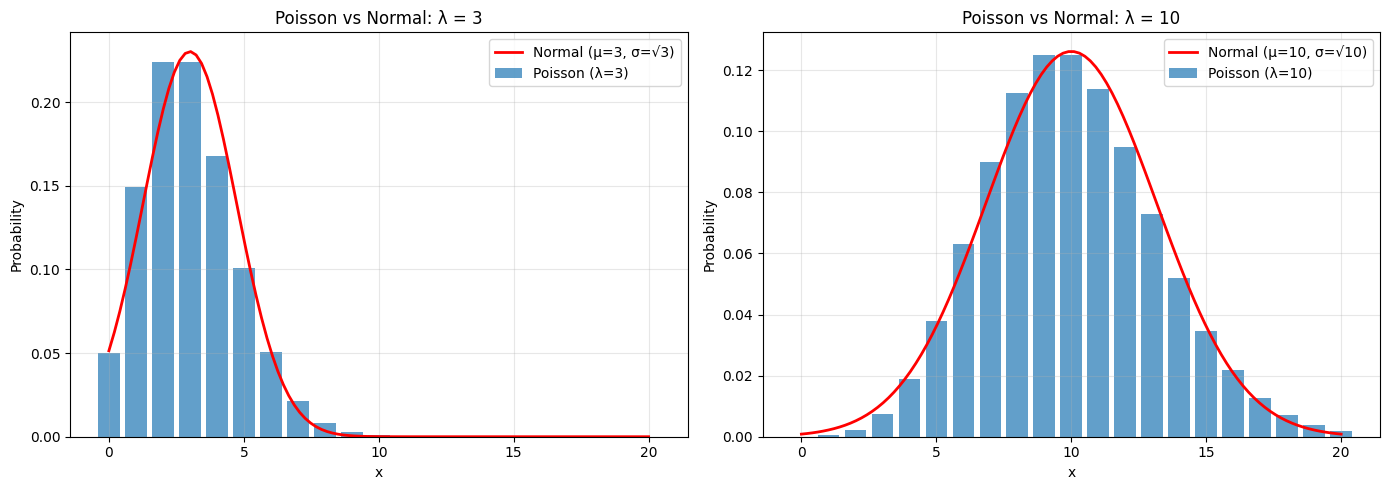

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, norm

# Create two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# ===== PLOT 1: λ = 3 =====
lambda1 = 3
x_poisson1 = np.arange(21)
x_normal1 = np.linspace(0, 20, 100)

# Poisson probabilities
poisson_probs1 = poisson.pmf(x_poisson1, lambda1)

# Normal probabilities
normal_probs1 = norm.pdf(x_normal1, loc=lambda1, scale=np.sqrt(lambda1))

# Plot on first subplot
ax1.bar(x_poisson1, poisson_probs1, label='Poisson (λ=3)', alpha=0.7)
ax1.plot(x_normal1, normal_probs1, label='Normal (μ=3, σ=√3)', color='red', linewidth=2)
ax1.set_title('Poisson vs Normal: λ = 3')
ax1.set_xlabel('x')
ax1.set_ylabel('Probability')
ax1.legend()
ax1.grid(True, alpha=0.3)

# ===== PLOT 2: λ = 10 =====
lambda2 = 10
x_poisson2 = np.arange(21)
x_normal2 = np.linspace(0, 20, 100)

# Poisson probabilities
poisson_probs2 = poisson.pmf(x_poisson2, lambda2)

# Normal probabilities
normal_probs2 = norm.pdf(x_normal2, loc=lambda2, scale=np.sqrt(lambda2))

# Plot on second subplot
ax2.bar(x_poisson2, poisson_probs2, label='Poisson (λ=10)', alpha=0.7)
ax2.plot(x_normal2, normal_probs2, label='Normal (μ=10, σ=√10)', color='red', linewidth=2)
ax2.set_title('Poisson vs Normal: λ = 10')
ax2.set_xlabel('x')
ax2.set_ylabel('Probability')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Similarities between Poisson and Normal

Both distributions are centered around the same value (λ for Poisson, μ for Normal)
Both show the highest probability near the center and lower probabilities in the tails
As λ increases, the Poisson distribution becomes more symmetric and bell-shaped, resembling the Normal distribution more closely

Differences between Poisson and Normal

The Poisson distribution is discrete (only whole numbers), while the Normal distribution is continuous (smooth curve)
When λ = 3, the Poisson distribution is noticeably right-skewed (leans to the left with a tail on the right), while the Normal is symmetric
The Poisson has a hard boundary at zero (can't have negative values)but the Normal curve extends below zero

Comparison between λ = 3 and λ = 10

At λ = 3 the Poisson is visibly skewed and the Normal curve doesn't match the bars very well
At λ = 10, the Poisson appears much more symmetric and bell-shaped, and the Normal curve fits the Poisson bars much better
The larger λ value makes the Poisson distribution look more "Normal-like"

Which λ is a better approximation?

λ = 10 provides a much better Normal approximation than λ = 3
This follows the general rule that the Normal distribution is a good approximation for Poisson when λ ≥ 10
When λ is small (like 3) the Poisson is too skewed for the Normal to be a good fit

Q4

In [ ]:
from scipy.stats import poisson, norm
import numpy as np

def binest(lambda_val, x):
    exact = poisson.cdf(x, lambda_val)
    mu = lambda_val
    sigma = np.sqrt(lambda_val)
    approx = norm.cdf(x + 0.5, loc=mu, scale=sigma)
    percent_error = abs(exact - approx) / exact * 100
    return exact, approx, percent_error

exact, approx, error = binest(10, 8)
print("Exact:", round(exact, 6))
print("Approx:", round(approx, 6))
print("Percent Error:", round(error, 6))

Exact: 0.33282
Approx: 0.317628
Percent Error: 4.564493


Q5

a) What's the probability that 2 accidents will happen in any single week?

In [ ]:
lambda_val = 1

# a) P(X = 2)
prob_a = poisson.pmf(2, lambda_val)
print("a) P(X = 2):", round(prob_a, 6))

a) P(X = 2): 0.18394


b) What's the probability that 0 or 1 accident will happen?

In [ ]:
lambda_val = 1

# b) P(X = 0 or X = 1) = P(X <= 1)
prob_b = poisson.cdf(1, lambda_val)
print("b) P(X <= 1):", round(prob_b, 6))

b) P(X <= 1): 0.735759


c) What's the probability this intersection would get flagged?


In [ ]:
lambda_val = 1

# c) P(X > 5)
prob_c = 1 - poisson.cdf(5, lambda_val)
print("c) P(X > 5):", round(prob_c, 6))

c) P(X > 5): 0.000594


Q6

a) What's the probability that Chong waits more than twice the average wait?


In [ ]:
from scipy.stats import expon

# Average wait = 10 minutes, so scale = 10
scale = 10

# a) P(X > 20)
prob_a = 1 - expon.cdf(20, loc=0, scale=scale)
print("a) P(X > 20):", round(prob_a, 6))

a) P(X > 20): 0.135335


b) What's the probability that Sydney waits an average amount of time or less?


In [ ]:
from scipy.stats import expon

scale = 10

# b) P(X <= 10)
prob_b = expon.cdf(10, loc=0, scale=scale)
print("b) P(X <= 10):", round(prob_b, 6))

b) P(X <= 10): 0.632121


c) The bank manager has been receiving complaints from about 3%
of their customers, one named Anthony, who say their wait times are
unacceptable. What’s the minimum wait time that appears to be
generating complaints?

In [ ]:
from scipy.stats import expon

scale = 10

# c) Find x where P(X <= x) = 0.97
# Use ppf (percent point function = inverse of cdf)
min_wait = expon.ppf(0.97, loc=0, scale=scale)
print("c) Minimum wait time generating complaints:", round(min_wait, 6))

c) Minimum wait time generating complaints: 35.065579


d) I am a customer of a different bank that has an average wait time
of 8 minutes. Which is more likely, that I wait 8 minutes or less
or Sydney waits 10 minutes or less? Explain. Show your justification.


In [ ]:
from scipy.stats import expon

# Neil's bank: scale = 8
scale_neil = 8
prob_neil = expon.cdf(8, loc=0, scale=scale_neil)
print("Neil P(X <= 8):", round(prob_neil, 6))

# Sydney's bank: scale = 10
scale_sydney = 10
prob_sydney = expon.cdf(10, loc=0, scale=scale_sydney)
print("Sydney P(X <= 10):", round(prob_sydney, 6))

# Compare
if prob_neil > prob_sydney:
    print("Neil waiting 8 minutes or less is more likely")
elif prob_sydney > prob_neil:
    print("Sydney waiting 10 minutes or less is more likely")
else:
    print("They are equally likely")

Neil P(X <= 8): 0.632121
Sydney P(X <= 10): 0.632121
They are equally likely


Explanation:
Both myself and Sydney are waiting for a time that equals their bank's average wait time or less. For exponential distributions, there's a special property: the probability of waiting less than or equal to the average is always about 63.2%, no matter what the actual average is. Since I am comparing to my 8-minute average and Sydney is comparing to her 10-minute average, we both have the same probability of approximately 0.632. Therefore, they are equally likely.